# Shark Attack - James Lawlor, C22388703

#### Convert to an appropriate colourspace to exaggerate the fish/sea difference
#### Enhance the images to increase contrast and definition
#### Enhance the fish portion of the image
#### Automatically crop and rotate the image to contain only the fish
#### The final image should be an enhanced image of the fish with a clean minimal background

##### Step 1: Import the image, convert to RGB.
##### Step 2: Use a kernel to sharpen the image.
##### Step 3: Convert to HSV, and take only the V, for value.
##### Step 4: Use "cv2.fastNlMeansDenoising()" to denoise the image.
##### Step 5: Use kernels to get four gradients: 2 vertical, from top and bottom, and 2 horizontal, from left and right.
##### Step 6: Add together the four gradient image to get 1 image that shows the outline in the image.
##### Step 7: Step all pixels above or below a certain value to either black or white, to get a binary image. The outline should be white.
##### Step 8: Find a position within the outline by averaging the positions of all white pixels.
##### Step 9: Use "cv2.floodFill()" to fill in the outline. This produces a mask, where the fish is fully white, and the rest is black.
##### Step 10: Because this is a binary image, the pixels are either 1 or 0. Multiply by 255, as uint8, to get back to a full colour range.
##### Step 11: Use "cv2.bitwise_not()" to flip the colours of the image, then convert from Gray to RGB.
##### Step 12: Then, use "cv2.bitwise_and()" on the mask and the original image, to capture only the white area of the mask (i.e. the fish).
##### Step 13: Lastly, I converted the image to RGBA, and inserted a copy of the original single-channel greyscale mask into the alpha channel, for transparency.




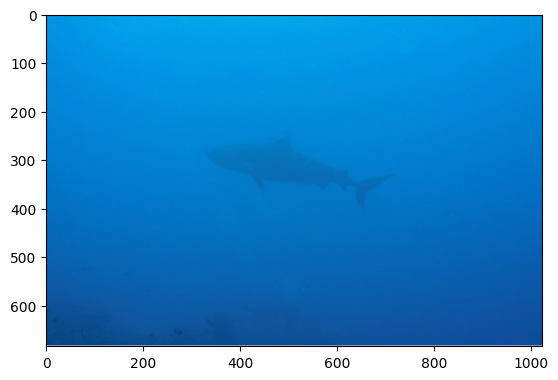

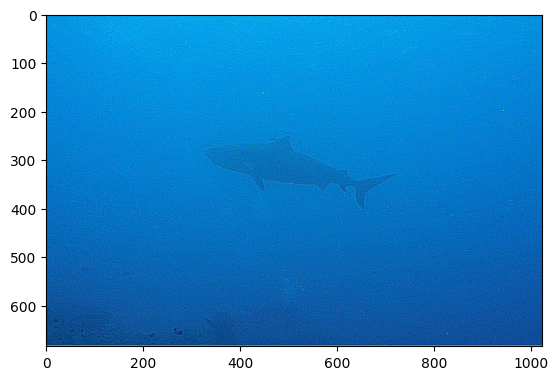

In [1]:
import cv2 as cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as image


I = cv2.imread('Shark 2.PNG')
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)

Original = I.copy()

plt.imshow(I)

k = np.array([[-2,-4,-2], [-4,25,-4], [-2,-4,-2]], dtype=float)

sharp = cv2.filter2D(I,ddepth=-1,kernel=k)

plt.show()
plt.imshow(sharp)

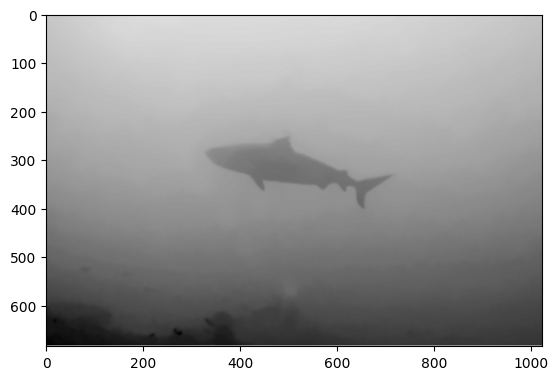

In [2]:
iHSV = cv2.cvtColor(I, cv2.COLOR_RGB2HSV)

v = iHSV[:,:,2]

dst = cv2.fastNlMeansDenoising(v,None,3,9,35)

plt.imshow(dst, cmap="gray")

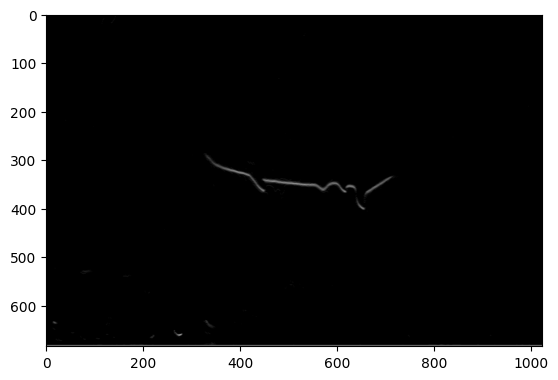

In [3]:
k = np.array([[-5,-10,-5], [0,0,0], [5,10,5]], dtype=float)

bottom = cv2.filter2D(dst,ddepth=-1,kernel=k)

plt.imshow(bottom, cmap="gray")

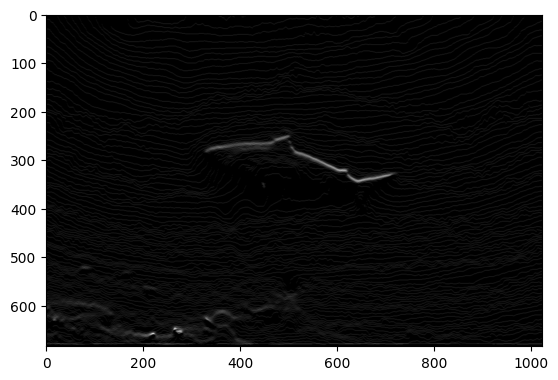

In [4]:
k = np.array([[5,10,5], [0,0,0], [-5,-10,-5]], dtype=float)

top = cv2.filter2D(dst,ddepth=-1,kernel=k)

plt.imshow(top, cmap="gray")

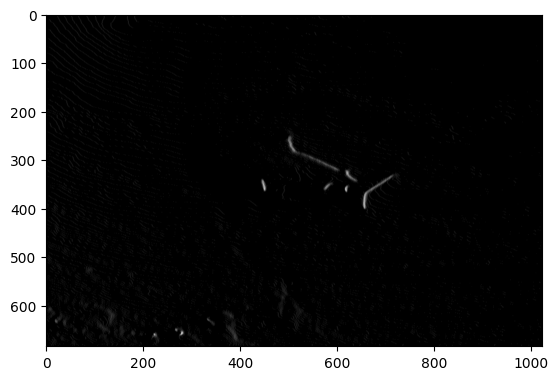

In [5]:
k = np.array([[-5,0,5], [-10,0,10], [-5,0,5]], dtype=float)

right = cv2.filter2D(dst,ddepth=-1,kernel=k)

plt.imshow(right, cmap="gray")

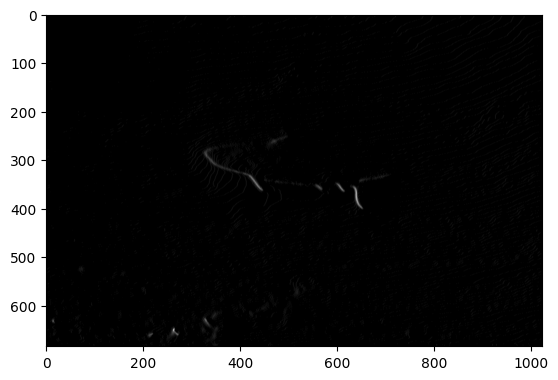

In [6]:
k = np.array([[5,0,-5], [10,0,-10], [5,0,-5]], dtype=float)

left = cv2.filter2D(dst,ddepth=-1,kernel=k)

plt.imshow(left, cmap="gray")

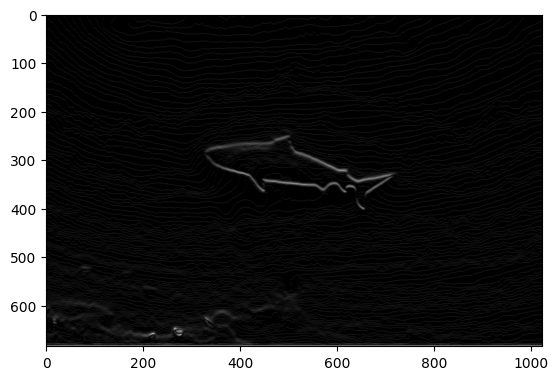

In [7]:
vertical = cv2.add(top, bottom)

plt.imshow(vertical, cmap="gray")

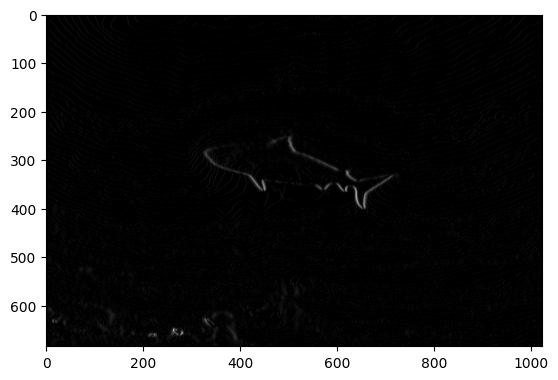

In [8]:
horizontal = cv2.add(left, right)

plt.imshow(horizontal, cmap="gray")

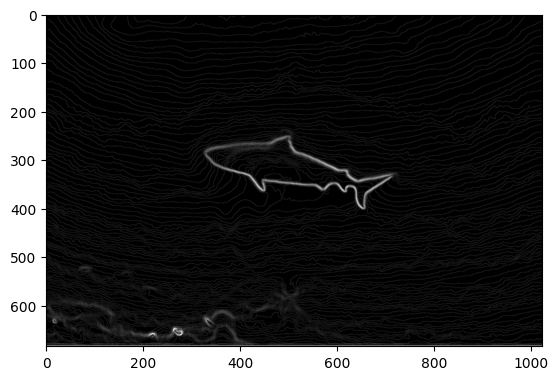

In [9]:
edges = cv2.add(vertical, horizontal)

plt.imshow(edges, cmap="gray")

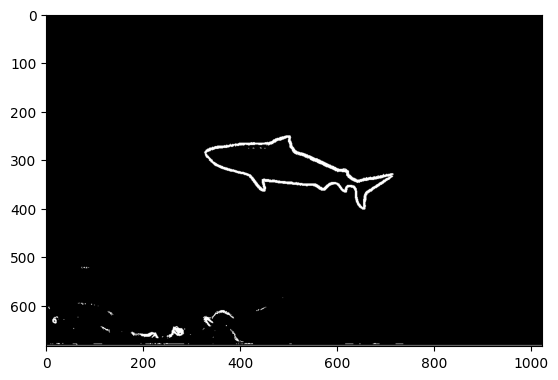

In [10]:
edges[edges >= 60] = 255
edges[edges < 60] = 0

plt.imshow(edges, cmap="gray")

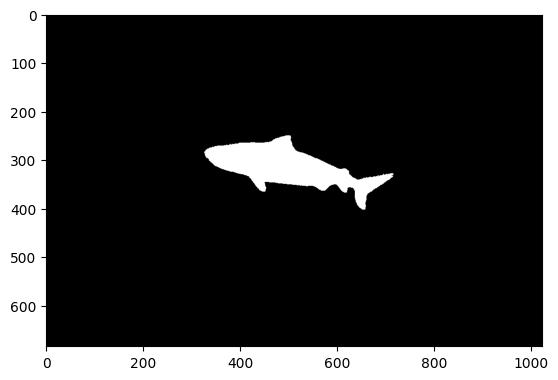

In [11]:
newEdges = np.full(edges.shape, 0, np.uint8)

contours, hierarchy = cv2.findContours(edges, mode = cv2.RETR_LIST, method = cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    if 500<cv2.contourArea(cnt):
        cv2.drawContours(newEdges,[cnt],0,255,-1)

plt.imshow(newEdges, cmap="gray")

432 473
432 473


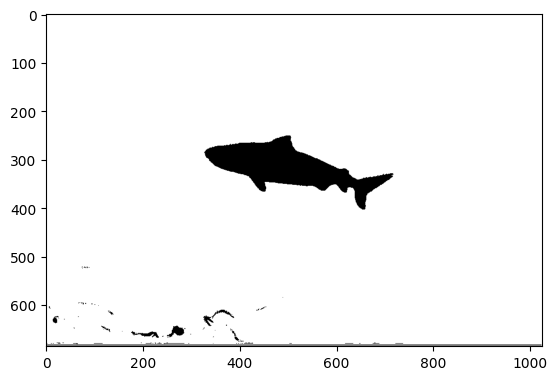

In [12]:
h, w = edges.shape[:2]
mask = np.full((h+2, w+2), 0, np.uint8)


x_coord = int(np.average(np.where(edges > 100)[0]))
y_coord = int(np.average(np.where(edges > 100)[1]))

print(x_coord, y_coord)

if x_coord > w:
    x_coord = w-1

elif x_coord < 0:
    x_coord = 0

if y_coord > h:
    y_coord = h-1

elif y_coord < 0:
    y_coord = 0

print(x_coord, y_coord)

cv2.floodFill(edges, mask, (x_coord,y_coord), 255)

plt.imshow(mask, cmap="gray")


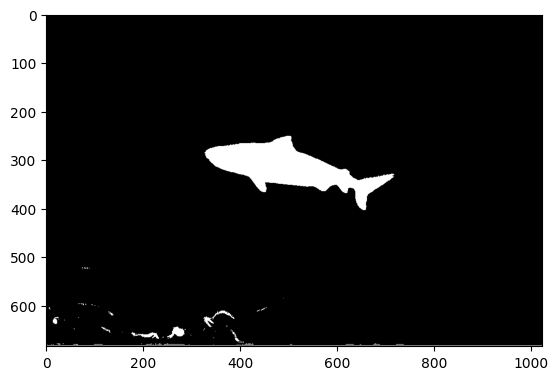

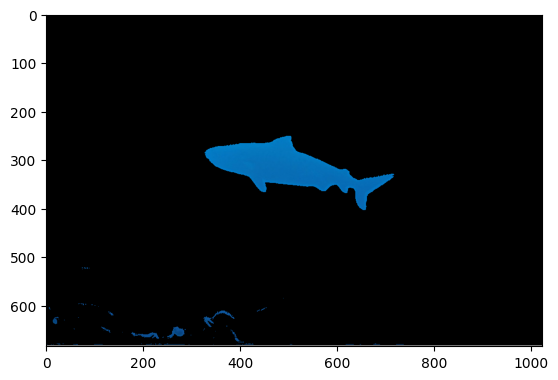

In [13]:
mask = (mask * 255).astype(np.uint8)

h, w = Original.shape[:2]

mask = mask[0:h, 0:w]

mask = cv2.bitwise_not(mask)

plt.imshow(mask, cmap="gray")

alpha = mask.copy()

mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)

maskedImg = cv2.bitwise_and(mask, Original)

plt.show()
plt.imshow(maskedImg)



In [14]:
print(maskedImg.shape)

right = max(np.where(maskedImg > 175)[1])
left = min(np.where(maskedImg > 175)[1])
bottom = max(np.where(maskedImg > 175)[0])
top = min(np.where(maskedImg > 175)[0])

croppedImage = maskedImg[top:bottom, left:right]
print(left, right, top, bottom)

(684, 1023, 3)
1 1022 251 683


In [15]:
result = cv2.cvtColor(maskedImg, cv2.COLOR_RGB2BGRA)

result[:,:,3] = alpha

#name = input("Please name your image:\n")

#cv2.imwrite(name, result)